In [68]:
# Load libraries
import numpy
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [69]:
data = read_csv('sonar.all-data.csv')

In [70]:
set_option('display.width', 100)
data.head(20)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,Freq_11,Freq_12,Freq_13,Freq_14,Freq_15,Freq_16,Freq_17,Freq_18,Freq_19,Freq_20,Freq_21,Freq_22,Freq_23,Freq_24,Freq_25,Freq_26,Freq_27,Freq_28,Freq_29,Freq_30,Freq_31,Freq_32,Freq_33,Freq_34,Freq_35,Freq_36,Freq_37,Freq_38,Freq_39,Freq_40,Freq_41,Freq_42,Freq_43,Freq_44,Freq_45,Freq_46,Freq_47,Freq_48,Freq_49,Freq_50,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,0.4006,0.3666,0.1050,0.1915,0.3930,0.4288,0.2546,0.1151,0.2196,0.1879,0.1437,0.2146,0.2360,0.1125,0.0254,0.0285,0.0178,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.

In [71]:
data.shape

(208, 61)

In [72]:
data.dtypes

Freq_1     float64
Freq_2     float64
Freq_3     float64
Freq_4     float64
Freq_5     float64
            ...   
Freq_57    float64
Freq_58    float64
Freq_59    float64
Freq_60    float64
Label       object
Length: 61, dtype: object

In [73]:
# descriptions, change precision to 3 places

print(data.describe())

           Freq_1      Freq_2      Freq_3      Freq_4  ...     Freq_57     Freq_58     Freq_59     Freq_60
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832    0.053892  ...    0.007820    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428    0.046528  ...    0.005785    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500    0.005800  ...    0.000300    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950    0.024375  ...    0.003700    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300    0.044050  ...    0.005950    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950    0.064500  ...    0.010425    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900    0.426400  ...    0.035500    0.044000    0.036400    0.043900

[8 rows x 60 columns]


In [74]:
data.groupby('Label').size()

Label
M    111
R     97
dtype: int64

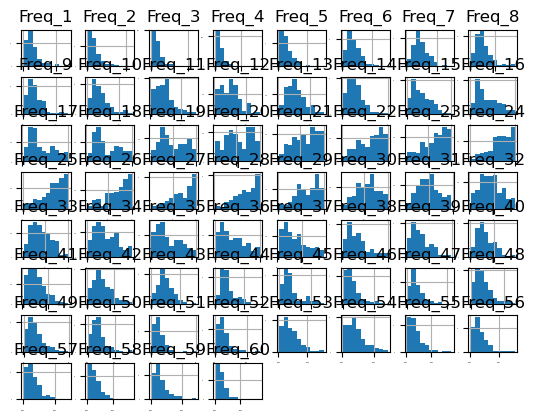

In [75]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

C:\Users\dilba\AppData\Local\Temp/ipykernel_11192/3944433141.py:2: UserWarning: When passing multiple axes, layout keyword is ignored.
  data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=3, ax=axes.ravel()[:60])


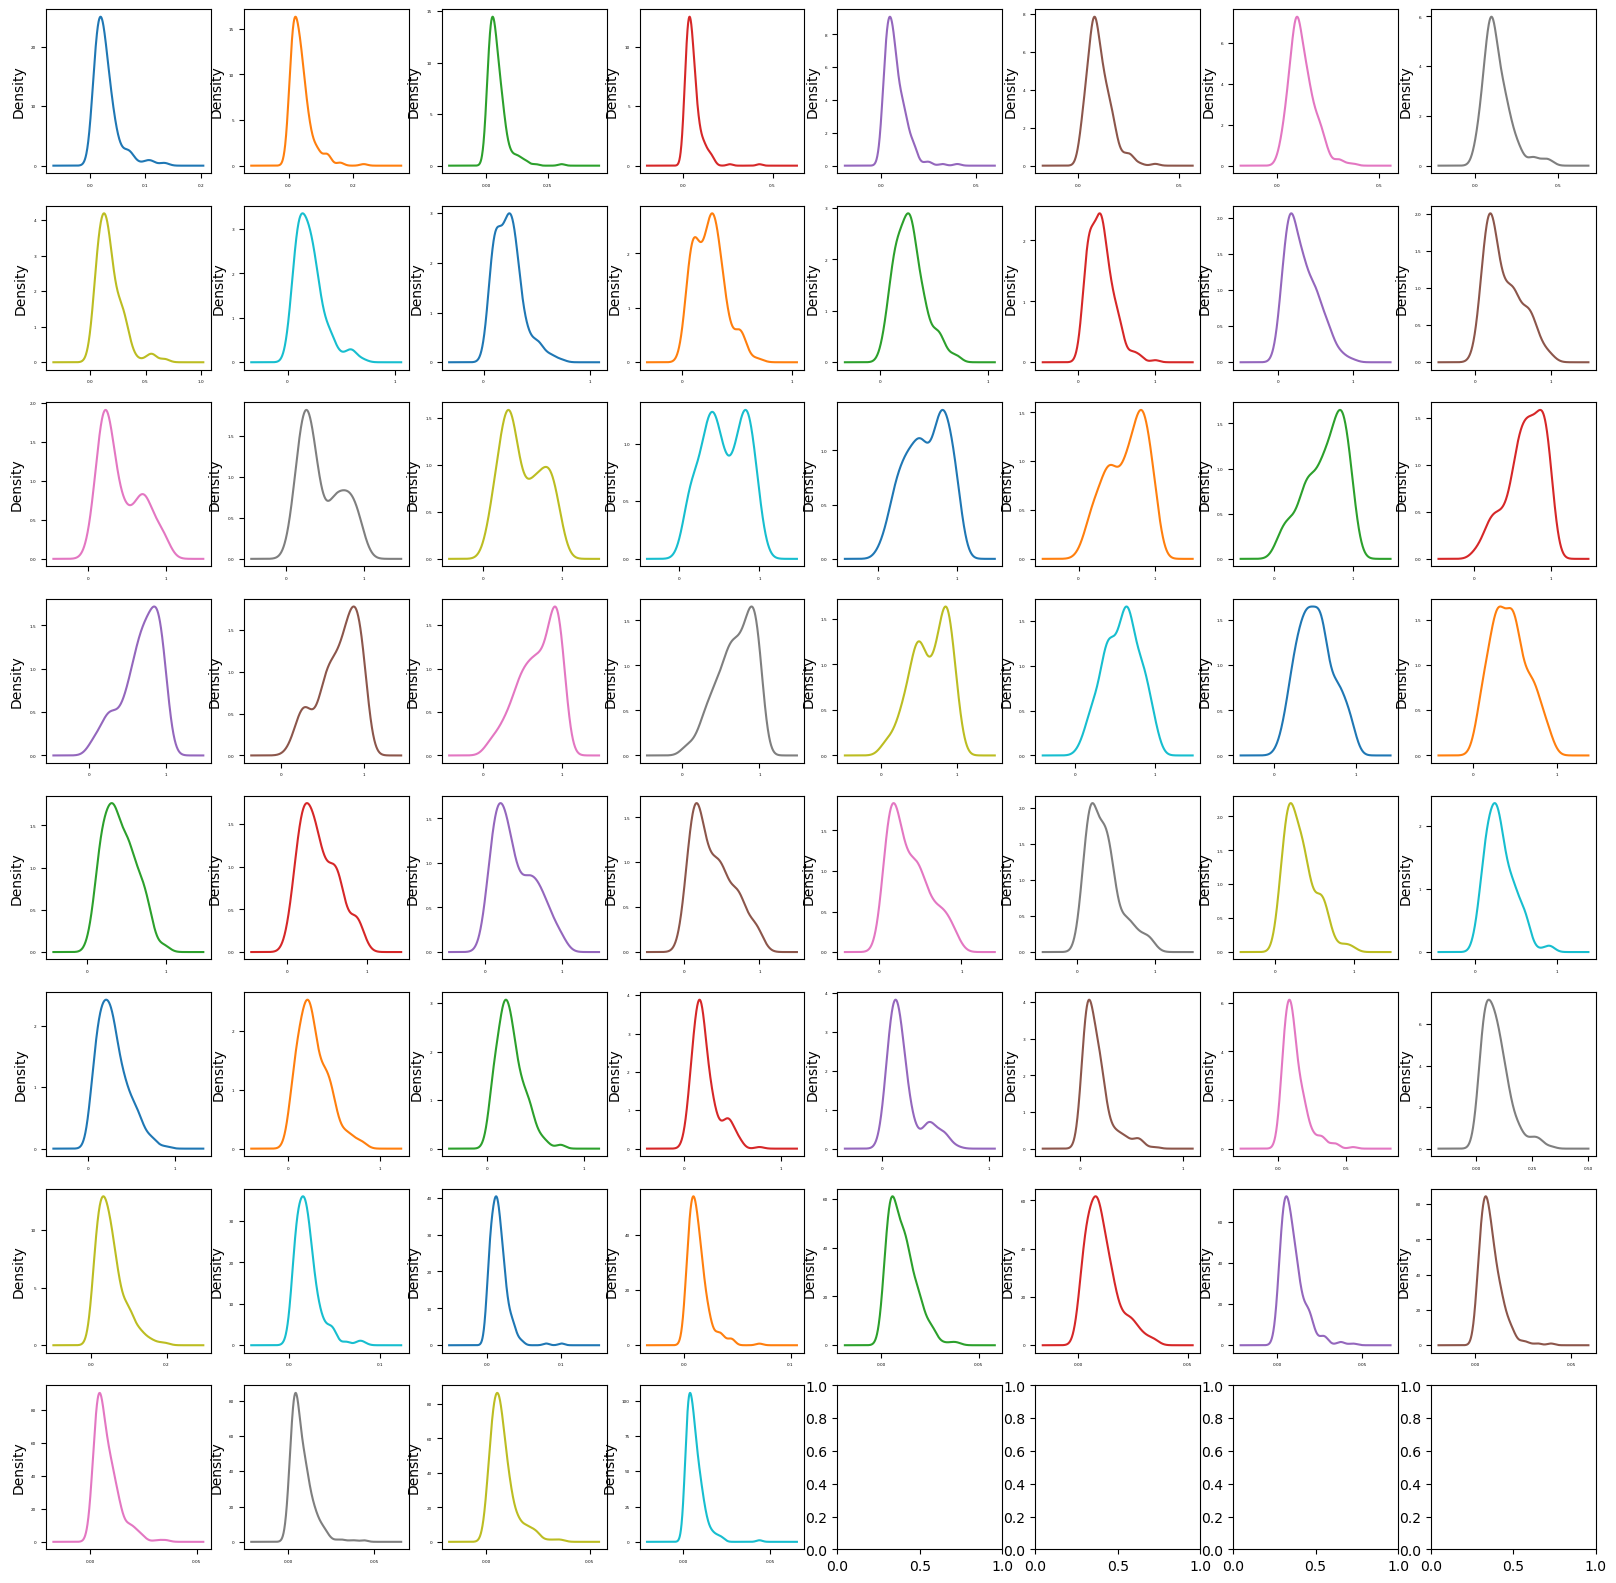

In [76]:
fig, axes = pyplot.subplots(nrows=8, ncols=8, figsize=(20,20))
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=3, ax=axes.ravel()[:60])
pyplot.show()


C:\Users\dilba\AppData\Local\Temp/ipykernel_11192/1938677446.py:2: UserWarning: When passing multiple axes, layout keyword is ignored.
  data.plot(kind='box', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=3, ax=axes.ravel()[:60])


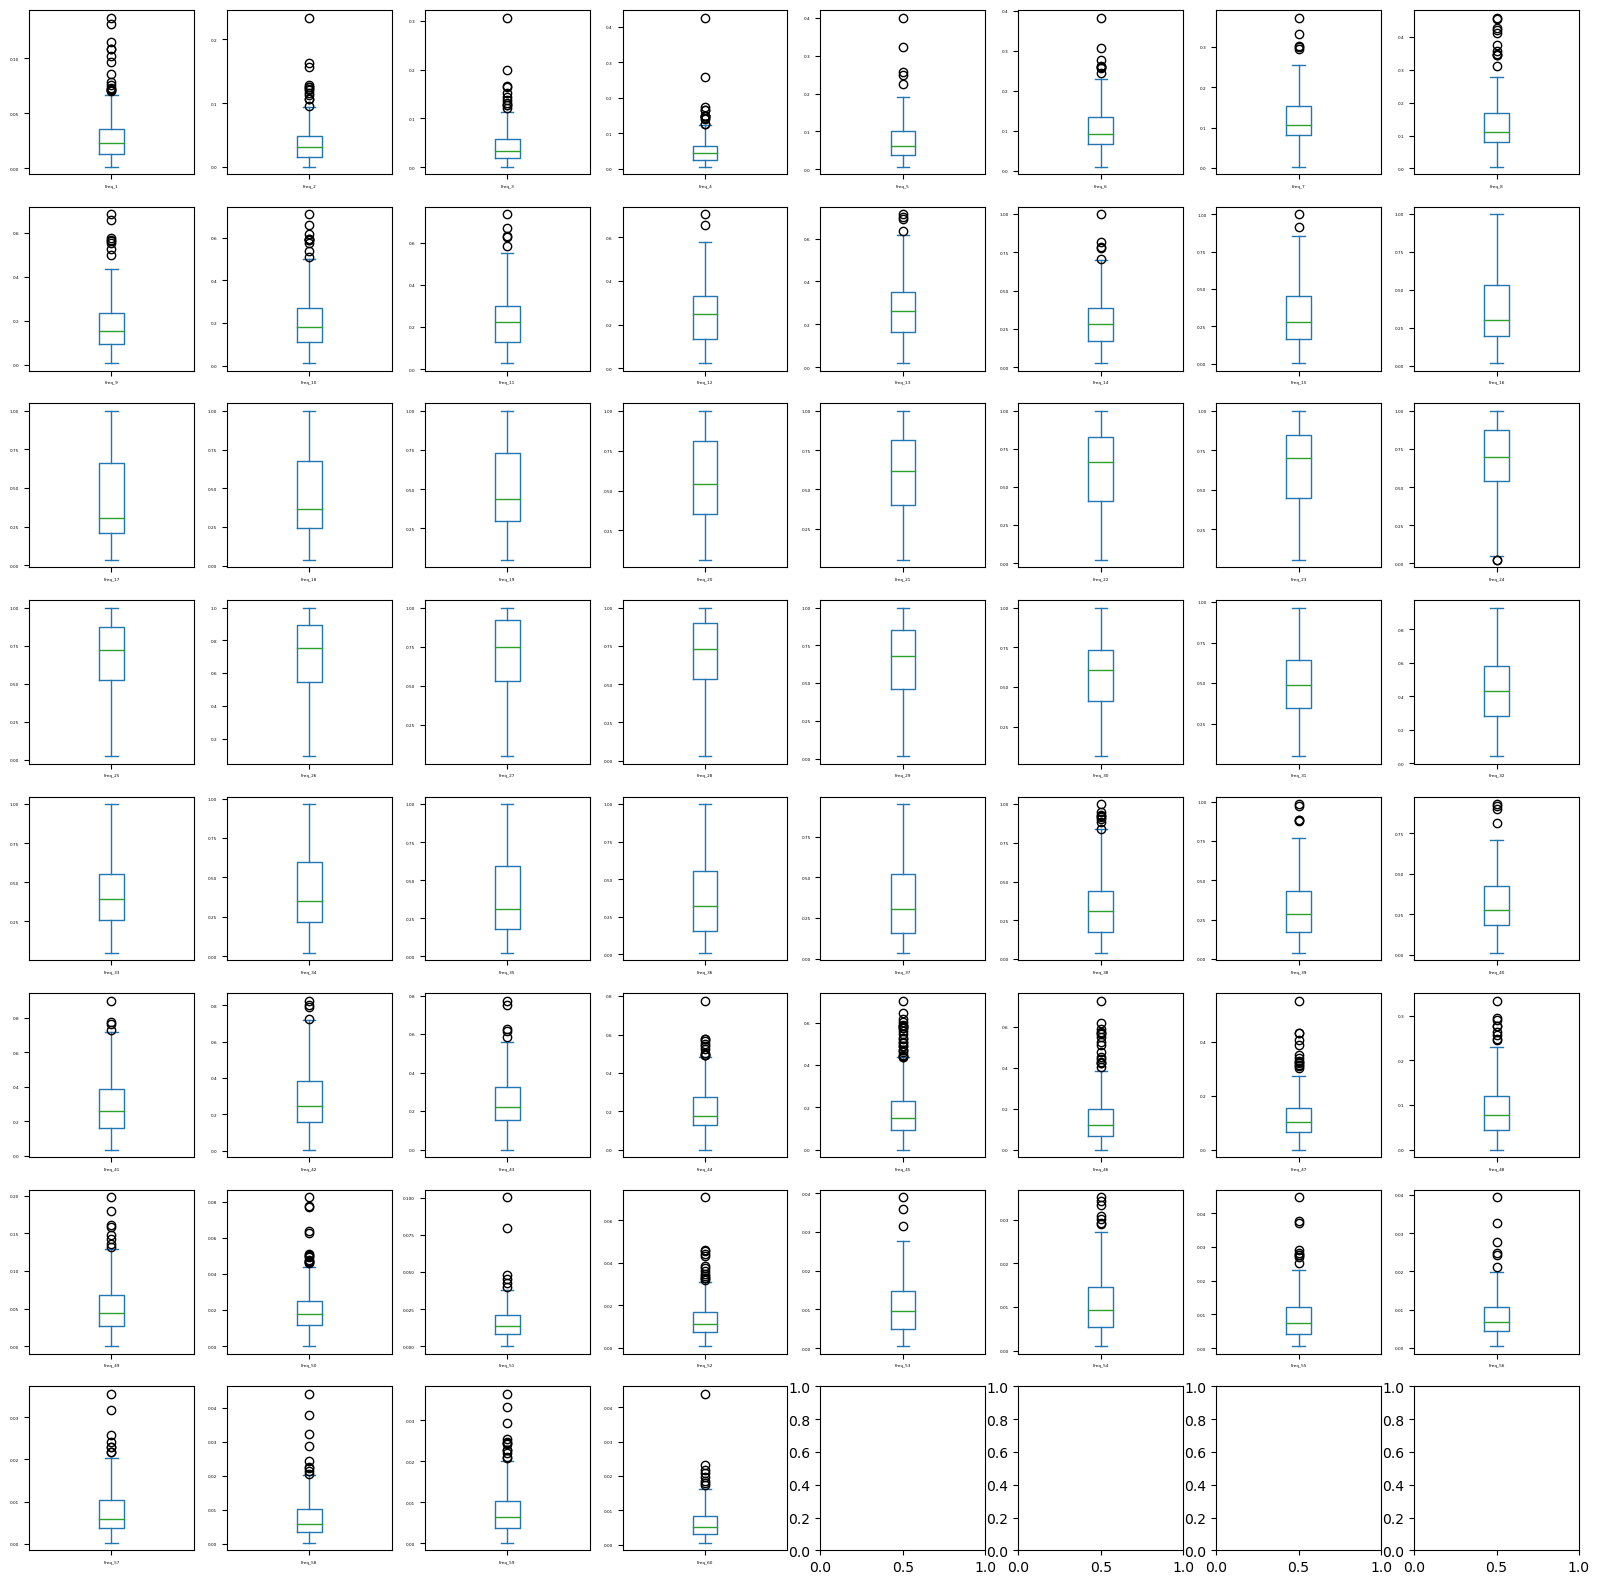

In [77]:
fig, axes = pyplot.subplots(nrows=8, ncols=8, figsize=(20,20))
data.plot(kind='box', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=3, ax=axes.ravel()[:60])
pyplot.show()


C:\Users\dilba\AppData\Local\Temp/ipykernel_11192/3203461281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


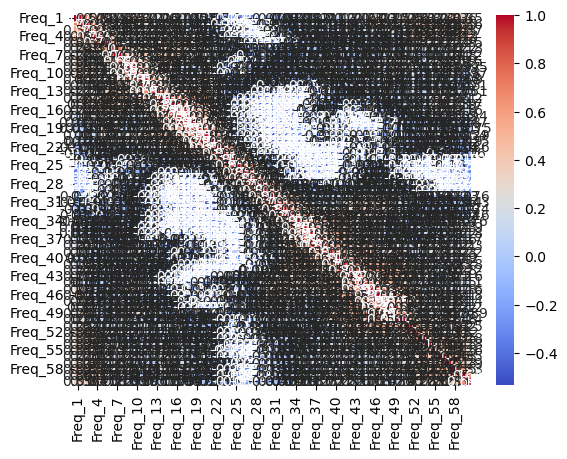

In [80]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
pyplot.show()


In [82]:
array = data.values
X = array[:, 0:60]
Y = array[:, 60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)


In [84]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [86]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [91]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.783333 (0.082369)
LDA: 0.765238 (0.073773)
KNN: 0.817381 (0.071777)
CART: 0.666905 (0.133599)
NB: 0.682381 (0.117611)
SVM: 0.807143 (0.087702)


In [ ]:
# So, this means both the SVM and KNN are good to use. 

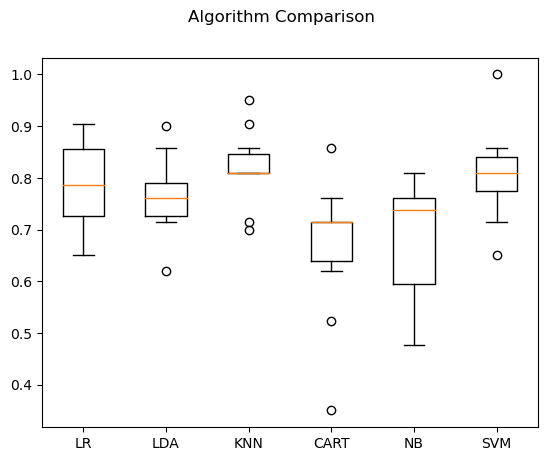

In [96]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [97]:
#The results showed a tight distribution for KNN, Whcih is encouraging, suggesting low variance.

In [100]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,  shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.754412 (0.067926)
ScaledLDA: 0.778676 (0.093570)
ScaledKNN: 0.808456 (0.107996)
ScaledCART: 0.715809 (0.104311)
ScaledNB: 0.682721 (0.136040)
ScaledSVM: 0.826103 (0.081814)


In [101]:
#Although, KNN is still doing well, But we observed that the standardization of data lifted the skill of the SVM to be the most accurate algorithm tetsed so far.

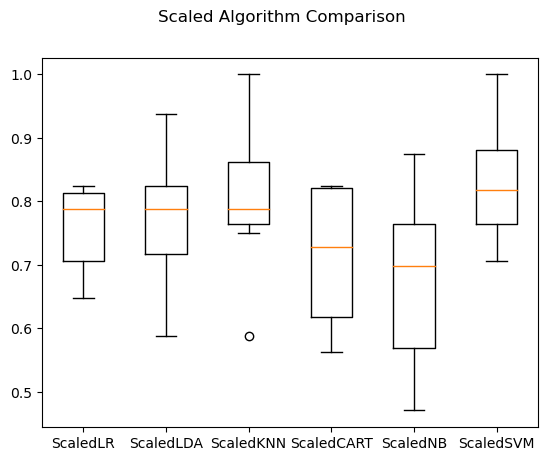

In [102]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [103]:
#So, Now we understand that both the KNN and the SVM provide the promising results. Now, we are going to tune these algorithms.


In [104]:
#Tuning KNN

In [106]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836029 using {'n_neighbors': 1}
0.836029 (0.079487) with: {'n_neighbors': 1}
0.813603 (0.088021) with: {'n_neighbors': 3}
0.814338 (0.096870) with: {'n_neighbors': 5}
0.777574 (0.120387) with: {'n_neighbors': 7}
0.730147 (0.099376) with: {'n_neighbors': 9}
0.741544 (0.073970) with: {'n_neighbors': 11}
0.710662 (0.105829) with: {'n_neighbors': 13}
0.723162 (0.080983) with: {'n_neighbors': 15}
0.698897 (0.072669) with: {'n_neighbors': 17}
0.710662 (0.091337) with: {'n_neighbors': 19}
0.698897 (0.091195) with: {'n_neighbors': 21}


In [107]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.850000 using {'C': 1.7, 'kernel': 'rbf'}
0.748529 (0.069953) with: {'C': 0.1, 'kernel': 'linear'}
0.582721 (0.127062) with: {'C': 0.1, 'kernel': 'poly'}
0.601103 (0.184435) with: {'C': 0.1, 'kernel': 'rbf'}
0.712868 (0.116579) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.754412 (0.082337) with: {'C': 0.3, 'kernel': 'linear'}
0.644118 (0.099873) with: {'C': 0.3, 'kernel': 'poly'}
0.742279 (0.081853) with: {'C': 0.3, 'kernel': 'rbf'}
0.748529 (0.069953) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765809 (0.070336) with: {'C': 0.5, 'kernel': 'linear'}
0.704779 (0.098225) with: {'C': 0.5, 'kernel': 'poly'}
0.784559 (0.068922) with: {'C': 0.5, 'kernel': 'rbf'}
0.760662 (0.065632) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.759926 (0.083206) with: {'C': 0.7, 'kernel': 'linear'}
0.759559 (0.093807) with: {'C': 0.7, 'kernel': 'poly'}
0.814338 (0.059832) with: {'C': 0.7, 'kernel': 'rbf'}
0.761029 (0.079602) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.765441 (0.066964) with: {'C': 0.9, 'kernel': 'linear'

In [108]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


AB: 0.782721 (0.072445)
GBM: 0.808088 (0.130779)
RF: 0.808824 (0.093400)
ET: 0.844118 (0.090447)


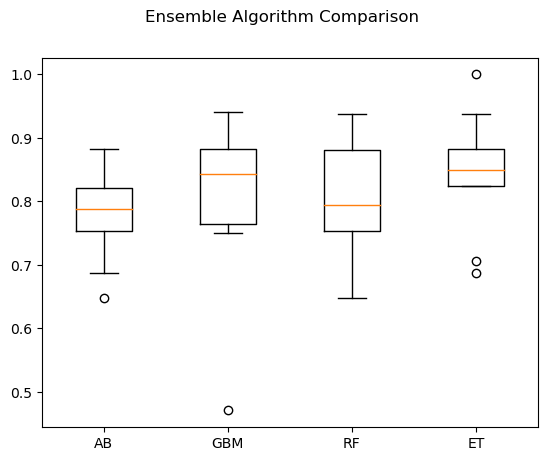

In [109]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [110]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [ ]:
#we achieved an accuracy of nearly 86% on the held-out validation dataset. A
#score that matches closely to our expectations estimated above during the tuning of SVM.
